In [14]:
 import pandas as pd
 import numpy as np
 import warnings
 warnings.filterwarnings('ignore')
 
 body = pd.read_csv(r'C:\Users\suhye\.vscode\Adp실기\데이터분석전문가_파이썬\6.머신러닝_지도학습\bodyPerformance.csv')

In [15]:
body['gender'] = np.where(body['gender'] == 'M',0,1)
body['class_1'] = np.where(body['class']=='A',1,0)
body

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class,class_1
0,27.0,0,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C,0
1,25.0,0,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A,1
2,31.0,0,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C,0
3,32.0,0,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B,0
4,28.0,0,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13388,25.0,0,172.1,71.80,16.2,74.0,141.0,35.8,17.4,47.0,198.0,C,0
13389,21.0,0,179.7,63.90,12.1,74.0,128.0,33.0,1.1,48.0,167.0,D,0
13390,39.0,0,177.2,80.50,20.1,78.0,132.0,63.5,16.4,45.0,229.0,A,1
13391,64.0,1,146.1,57.70,40.4,68.0,121.0,19.3,9.2,0.0,75.0,D,0


In [16]:
from sklearn.model_selection import train_test_split

feature_columns = list(body.columns.difference(['class','class_1']))
x = body[feature_columns]
y = body['class_1']

x_train, x_test, y_train, y_test = train_test_split(x,y,stratify=y,train_size=0.7,random_state=1)

print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(9375, 11) (4018, 11) (9375,) (4018,)


In [17]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [18]:
proba = pd.DataFrame(lr.predict_proba(x_train))
cs = lr.decision_function(x_train)

df = pd.concat([proba,pd.DataFrame(cs)],axis=1)
df.columns = ['Not A','A','decision_function']

df.sort_values(['decision_function'],inplace=True)
df.reset_index(inplace=True, drop=True)

df


,Not A,A,decision_function
0,1.000000,2.147037e-08,-17.656592
1,1.000000,8.008509e-08,-16.340176
2,1.000000,9.500333e-08,-16.169354
3,1.000000,9.818539e-08,-16.136408
4,1.000000,1.501425e-07,-15.711681
...,...,...,...
9370,0.002325,9.976745e-01,6.061507
9371,0.002270,9.977298e-01,6.085634
9372,0.002122,9.978779e-01,6.153205
9373,0.001085,9.989145e-01,6.824669


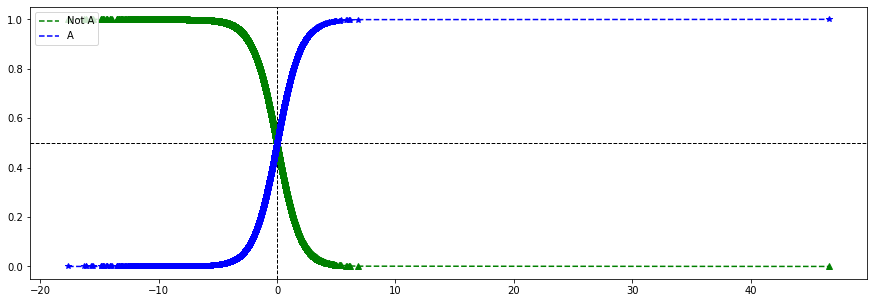

In [19]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,5))

plt.axhline(y=0.5, linestyle='--',color='black',linewidth=1)
plt.axvline(x=0, linestyle='--',color = 'black',linewidth=1)

plt.plot(df['decision_function'],df['Not A'],'g--',label = 'Not A')
plt.plot(df['decision_function'],df['Not A'],'g^')
plt.plot(df['decision_function'],df['A'],'b--',label = 'A')
plt.plot(df['decision_function'],df['A'],'b*')

plt.xlabel
plt.ylabel

plt.legend(loc='upper left')
plt.show()

In [20]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
pred = lr.predict(x_test)

test_cm = confusion_matrix(y_test,pred)
test_acc = accuracy_score(y_test,pred)
test_prc = precision_score(y_test,pred)
test_rc = recall_score(y_test,pred)
test_f1 = f1_score(y_test,pred)


print(test_cm,'\n')
print('정확도\t{}%'.format(round(test_acc*100,2)))
print('정밀도\t{}%'.format(round(test_prc*100,2)))
print('재현율\t{}%'.format(round(test_rc*100,2)))
print('f1\t{}%'.format(round(test_f1*100,2)))

[[2773  241]
 [ 355  649]] 

정확도	85.17%
정밀도	72.92%
재현율	64.64%
f1	68.53%


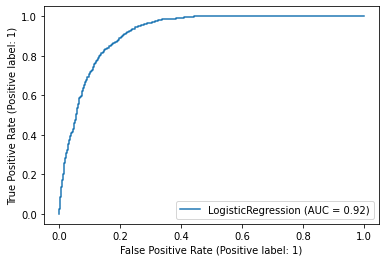

In [22]:
#ROC 커브, AUC 시각화
import matplotlib.pyplot as plt
from sklearn.metrics import plot_roc_curve

plot_roc_curve(lr,x_test,y_test)
plt.show()